In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv(r'D:\DA_Portfolio\Global Condom Sales and Awareness (2015-2025)\Dataset\Rich_Global_Condom_Usage_Dataset.csv')
df['Year'] = pd.to_datetime(df['Year'], errors='coerce', format='%Y')  
df['Year'] = df['Year'].dt.year


df[['Male Purchases (%)', 'Female Purchases (%)']] = df['Male vs Female Purchases (%)'].str.extract(r'(\d+)% Male - (\d+)% Female')
df = df.drop(columns='Male vs Female Purchases (%)')

df.rename(columns={'Teen Pregnancy Rate (per 1000 teens)': 'Teen Pregnancy Rate (per 10000 teens)'}, inplace=True)

df['Male Purchases (%)'] = pd.to_numeric(df['Male Purchases (%)'], errors='coerce')
df['Female Purchases (%)'] = pd.to_numeric(df['Female Purchases (%)'], errors='coerce')

custom_palette = ['#E63946','#A8DADC', '#457B9D', '#1D3557','#F1FAEE']

In [13]:
df.columns

Index(['Year', 'Country', 'Total Sales (Million Units)',
       'Market Revenue (Million USD)', 'Government Campaigns',
       'Awareness Index (0-10)', 'Most Popular Condom Type',
       'Contraceptive Usage Rate (%)', 'Teen Pregnancy Rate (per 10000 teens)',
       'HIV Prevention Awareness (%)', 'Online Sales (%)',
       'Average Price per Condom (USD)', 'Brand Dominance',
       'Sex Education Programs (Yes/No)', 'Male Purchases (%)',
       'Female Purchases (%)'],
      dtype='object')

In [14]:
df_countries_sales = df.groupby('Country')['Market Revenue (Million USD)'].sum().reset_index()
df_countries_sales

,Country,Market Revenue (Million USD)
0,Australia,102544.986667
1,Brazil,151467.522437
2,China,141484.896667
3,France,123580.047973
4,Germany,143554.103961
5,India,123681.243191
6,Japan,122796.577851
7,South Africa,140857.438589
8,UK,153595.090535
9,USA,149495.527637


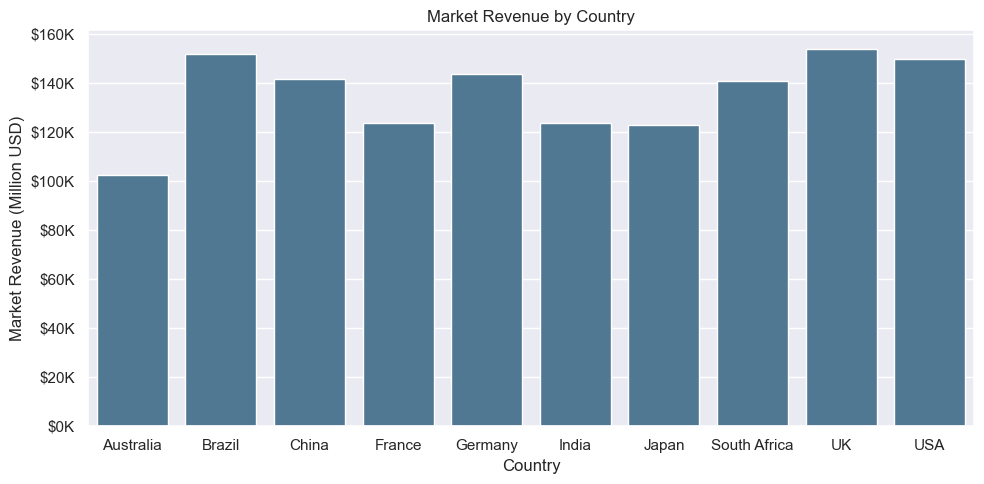

In [15]:
plt.figure(figsize=(10,5))
sns.set_theme(style='darkgrid')


ax = sns.barplot(data=df_countries_sales, x='Country', y='Market Revenue (Million USD)',color='#457B9D')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


plt.ylabel("Market Revenue (Million USD)")
plt.xlabel("Country")
plt.title("Market Revenue by Country")
plt.tight_layout()
plt.show()

In [16]:
df_countries_sales.sort_values(by='Market Revenue (Million USD)',ascending=False)

,Country,Market Revenue (Million USD)
8,UK,153595.090535
1,Brazil,151467.522437
9,USA,149495.527637
4,Germany,143554.103961
2,China,141484.896667
7,South Africa,140857.438589
5,India,123681.243191
3,France,123580.047973
6,Japan,122796.577851
0,Australia,102544.986667
